# Best Location for an Asian Restaurant in Manhattan

The success of a new restaurant depends on many factors, including demand, competition, quality of food, etc. Therefore, it is important to find the most strategic location to maximize the business' profit. 

To open an Asian restaurant in Manhattan, which location would appear to be the optimal and most strategi location for the business operations? This project will help you answer that question! I utilize Foursquare API and NYC Census Data for this project. My reasonings are based off number of competitions, spending power, and population across each neighborhood.

In [66]:
import pandas as pd     
import numpy as np  

import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

## I. Loading Data & Mapping NYC

In [67]:
# Loading NYC Census Data 
df = pd.read_csv('/Users/chauchu/Downloads/NYC_census.csv')
df.rename(columns={'Avg Income/Household': 'Household Income','neighborhood':'Neighbourhood'}, inplace = True)
df = df[df['borough'] == 'Manhattan']
df.head()

,zip,borough,post_office,Neighbourhood,population,lat,long,Household Income
0,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,40.750722,-73.997276,40932
1,10002,Manhattan,"New York, NY",Lower East Side,81410,40.715952,-73.985870,24022
2,10003,Manhattan,"New York, NY",Lower East Side,56024,40.731856,-73.989145,60891
3,10004,Manhattan,"New York, NY",Lower Manhattan,3089,40.691870,-74.014109,101868
4,10005,Manhattan,"New York, NY",Lower Manhattan,7135,40.705390,-74.008988,79517


In [68]:
#Find lattitude and longtitude of NYC
address = 'New York'
geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of New York are {}, {}".format(latitude, longitude))

The geographical coordinates of New York are 40.7127281, -74.0060152


In [69]:
# map NYC using Folium
ny = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df['lat'], df['long'], df['Neighbourhood']):
  label = '{}'.format(neighborhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(ny)

ny

## II. Get Competitions Information using Foursquare API

### 1. Foursquare API

In [70]:
CLIENT_ID = '' # My Foursquare Client_id
CLIENT_SECRET = '' # My Foursquare Client_secret
VERSION = '20200827'

In [71]:
import requests
LIMIT = 100
radius = 1500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

In [72]:
# Check to see what information Foursquare API provides
results = requests.get(url).json()['response']['groups'][0]['items']

results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b929790f964a5209a0734e3',
   'name': 'Nelson A. Rockefeller Park',
   'location': {'address': 'North end of Battery Park City & West of River Terrace',
    'crossStreet': 'at Warren  St',
    'lat': 40.717094779422354,
    'lng': -74.01671648025513,
    'labeledLatLngs': [{'label': 'display',
      'lat': 40.717094779422354,
      'lng': -74.01671648025513}],
    'distance': 97,
    'postalCode': '10280',
    'cc': 'US',
    'city': 'New York',
    'state': 'NY',
    'country': 'United States',
    'formattedAddress': ['North end of Battery Park City & West of River Terrace (at Warren  St)',
     'New York, NY 10280',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d163941735',
     'name': 'Park',
     'pluralName': 'Parks',
     'shortName': 'Park',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/cate

In [73]:
#Create function to get information needed from competitions
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
  venues_list = []
  for name, lat, lng in zip(names, latitudes, longitudes):
    print(name)

    # API request url
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

    #GET request
    results = requests.get(url).json()['response']['groups'][0]['items']

    #return only relevant information for each nearby venue
    venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['location']['formattedAddress'][1][-5:], #get zipcode of the restaurant-the "postalCode" didn't work for some reasons
        v['venue']['categories'][0]['name']) for v in results
        ])
  
  nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
  nearby_venues.columns = ['Neighbourhood',
                           'Neighbourhood Latitude',
                           'Neighbourhood Longitude',
                           'Venue',
                           'Venue Latitude',
                           'Venue Longitude',
                           'Venue Zipcode',
                           'Venue Category']

  return(nearby_venues)

In [74]:
#dataFrame with all venues in Manhattan
ny_venues = getNearbyVenues(names=df['Neighbourhood'],
                                 latitudes=df['lat'],
                                 longitudes=df['long'])

Chelsea and Clinton
Lower East Side
Lower East Side
Lower Manhattan
Lower Manhattan
Lower Manhattan
Lower Manhattan
Lower East Side
Gramercy Park and Murray Hill
Chelsea and Clinton
Greenwich Village and Soho
Greenwich Village and Soho
Greenwich Village and Soho
Gramercy Park and Murray Hill
Gramercy Park and Murray Hill
Chelsea and Clinton
Chelsea and Clinton
Upper East Side
Gramercy Park and Murray Hill
Upper West Side
Upper West Side
Upper West Side
Central Harlem
Central Harlem
Upper East Side
East Harlem
Central Harlem
Inwood and Washington Heights
Inwood and Washington Heights
Inwood and Washington Heights
Inwood and Washington Heights
East Harlem
Chelsea and Clinton
Central Harlem
Lower Manhattan
Central Harlem
Inwood and Washington Heights
Upper East Side
Upper West Side
Upper East Side
Tribeca


Let's check to see how many venues each neighbourhood has!

In [75]:
ny_venues.groupby("Neighbourhood").Venue.count()

Neighbourhood
Central Harlem                   500
Chelsea and Clinton              500
East Harlem                      200
Gramercy Park and Murray Hill    400
Greenwich Village and Soho       300
Inwood and Washington Heights    500
Lower East Side                  300
Lower Manhattan                  500
Tribeca                          100
Upper East Side                  400
Upper West Side                  400
Name: Venue, dtype: int64

What kind of venues are they?

In [76]:
ny_venues['Venue Category'].unique()

array(['Coffee Shop', 'Pizza Place', 'Music Venue', 'Camera Store',
       'Basketball Stadium', 'Lounge', 'Furniture / Home Store',
       'Martial Arts School', 'Italian Restaurant',
       'Health & Beauty Service', 'Bagel Shop', 'Bakery', 'Indie Theater',
       'Theater', 'Boxing Gym', 'Performing Arts Venue', 'Public Art',
       'Art Gallery', 'Café', 'Supermarket', 'Miscellaneous Shop',
       'Piano Bar', 'Gym / Fitness Center', 'Hotel', 'Park',
       'Tapas Restaurant', 'Beer Bar', 'Event Space', 'Bike Shop',
       'Speakeasy', 'Burger Joint', 'Cosmetics Shop', 'Sushi Restaurant',
       'American Restaurant', 'Comic Shop', 'Korean Restaurant',
       'Japanese Restaurant', 'Steakhouse', 'Dessert Shop', 'Salad Place',
       'Building', 'Cuban Restaurant', 'Pharmacy', 'Scenic Lookout',
       'Cupcake Shop', 'Sandwich Place', 'New American Restaurant',
       'Recreation Center', 'Ice Cream Shop', 'Taco Place',
       'Salon / Barbershop', 'Grocery Store', 'Bookstore', 'Com

In [77]:
ny_venues['Venue Zipcode'].unique()

array(['10001', '10121', '10018', 'tates', '10011', '10036', 'k, NY',
       '10118', '10010', '10016', '10002', '10009', '10003', '10013',
       '10012', '10019', '10014', '10004', '11231', '11201', '10041',
       '10023', 'n, NY', '10005', '10038', '10006', '10271', '10007',
       '10280', '10281', '10282', '10017', '10174', '10170', '10022',
       '10169', '10154', '10020', '10112', '10111', '10103', '10044',
       '10021', '10065', '10075', '10028', '10153', '10069', '10024',
       '10025', '-7708', '10026', '10027', '10029', '10035', 'm, NY',
       '10030', '10037', '10031', '10128', '10039', '10451', '10456',
       '10032', '10033', '10452', '10040', '10453', '10034', '10463',
       ' York', '10468', '10454', 'x, NY', '11106', '10162', '11101'],
      dtype=object)

In [78]:
index_ob = ny_venues[(ny_venues['Venue Zipcode']=='tates')|(ny_venues['Venue Zipcode']=='k, NY')|
                    (ny_venues['Venue Zipcode']=='n, NY')|(ny_venues['Venue Zipcode']=='m, NY')|
                    (ny_venues['Venue Zipcode']=='x, NY')|(ny_venues['Venue Zipcode']==' York')|
                    (ny_venues['Venue Zipcode']=='-7708')].index
ny_venues.drop(index_ob, inplace = True)

Since a lot of restaurants are Southest Asian, I'm going to re-categorize them as Asian Restaurant!

In [79]:
ny_venues['Venue Category'].replace(['Chinese Restaurant','Thai Restaurant','Japanese Restaurant','Vietnamese Restaurant',
                                    'Korean Restaurant','Taiwanese Restaurant','Cantonese Restaurant','Malay Restaurant',
                                    'Filipino Restaurant','Tibetan Restaurant','Szechuan Restaurant'],
                                    'Asian Restaurant', inplace = True)

ny_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Zipcode,Venue Category
0,Chelsea and Clinton,40.750722,-73.997276,Bluestone Lane,40.752068,-73.998848,10001,Coffee Shop
1,Chelsea and Clinton,40.750722,-73.997276,New York Pizza Suprema,40.750124,-73.994992,10001,Pizza Place
2,Chelsea and Clinton,40.750722,-73.997276,Music Choice,40.752632,-73.994585,10001,Music Venue
3,Chelsea and Clinton,40.750722,-73.997276,B&H Photo Video,40.753277,-73.996470,10001,Camera Store
4,Chelsea and Clinton,40.750722,-73.997276,Madison Square Garden,40.750752,-73.993542,10121,Basketball Stadium


### 2. EDA & Data Pre-processing

First, I'm going to use one hot encoding in order to get the mean frequency of Asian Restaurant in each Neighbourhood & Zipcode

In [80]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix='', prefix_sep='')

# add neighbourhood to column back to data frame
ny_onehot['Neighbourhood'] = ny_venues['Neighbourhood']

# move neighbourhood & zipcode column to the first column
cols = list(ny_onehot)
cols.insert(0, cols.pop(cols.index('Neighbourhood')))
ny_onehot = ny_onehot.loc[:,cols]
ny_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Game Store,Volleyball Court,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Chelsea and Clinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chelsea and Clinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chelsea and Clinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chelsea and Clinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chelsea and Clinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Group rows by neighborhood and by taking the mean of the frequency of occurrence of Asian restaurants
ny_grouped = ny_onehot.groupby('Neighbourhood').mean().reset_index()
ny_grouped = ny_grouped[['Neighbourhood', 'Asian Restaurant']]
ny_grouped.head()

,Neighbourhood,Asian Restaurant
0,Central Harlem,0.023656
1,Chelsea and Clinton,0.043210
2,East Harlem,0.038462
3,Gramercy Park and Murray Hill,0.083333
4,Greenwich Village and Soho,0.027119


#### Plot Mean Frequency of Asian Restaurants in Each Neighbourhood in Manhattan

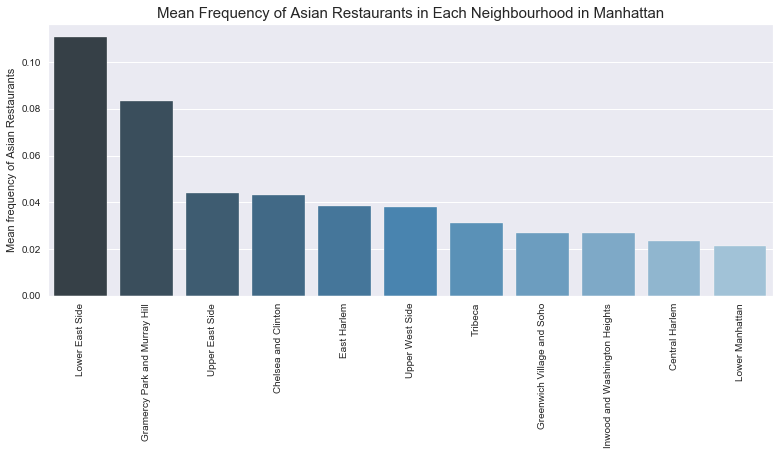

In [82]:
# sort neighborhood by descending order of Asian Restaurant
ny_grouped.sort_values(by='Asian Restaurant', ascending=False, inplace=True)

plt.figure(figsize=(13,5))
asian_rest = sns.barplot(x='Neighbourhood', y = 'Asian Restaurant', data = ny_grouped, palette="Blues_d")

plt.title('Mean Frequency of Asian Restaurants in Each Neighbourhood in Manhattan', fontsize = 15)
plt.xlabel(' ')
plt.ylabel('Mean frequency of Asian Restaurants')
plt.xticks(rotation=90)

plt.show()


#### Plot Distribution of Median Household Income in Each Neighbourhood in Manhattan

In [83]:
income = df.groupby('Neighbourhood')['Household Income'].mean()
df = df.merge(income, on='Neighbourhood')
df.rename(columns ={'Household Income_y':'Average Household Income', 
                    'Household Income_x':'Household Income'}, inplace = True)
df.head()

,zip,borough,post_office,Neighbourhood,population,lat,long,Household Income,Average Household Income
0,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,40.750722,-73.997276,40932,49698.8
1,10011,Manhattan,"New York, NY",Chelsea and Clinton,50984,40.741844,-74.000711,61986,49698.8
2,10018,Manhattan,"New York, NY",Chelsea and Clinton,5229,40.754969,-73.992126,48705,49698.8
3,10019,Manhattan,"New York, NY",Chelsea and Clinton,42870,40.766331,-73.985013,55869,49698.8
4,10036,Manhattan,"New York, NY",Chelsea and Clinton,24711,40.759614,-73.991148,41002,49698.8


/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

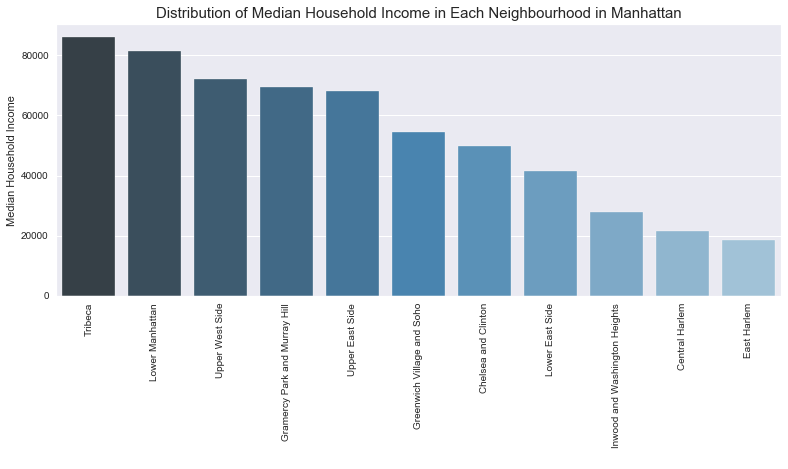

In [84]:
df_income = df[['Neighbourhood', 'Average Household Income']]
df_income.sort_values(by='Average Household Income', ascending = False, inplace = True)

plt.figure(figsize=(13,5))
income = sns.barplot(x='Neighbourhood', y = 'Average Household Income', data = df_income, palette="Blues_d")
plt.title('Distribution of Median Household Income in Each Neighbourhood in Manhattan', fontsize = 15)
plt.ylabel('Median Household Income')
plt.xlabel(' ')
plt.xticks(rotation=90)

#### Plot Distribution of Average Population in Each Neighbourhood in Manhattan

In [85]:
pop = df.groupby('Neighbourhood')['population'].mean()
df = df.merge(pop, on='Neighbourhood')
df.head()

,zip,borough,post_office,Neighbourhood,population_x,lat,long,Household Income,Average Household Income,population_y
0,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,40.750722,-73.997276,40932,49698.8,28979.2
1,10011,Manhattan,"New York, NY",Chelsea and Clinton,50984,40.741844,-74.000711,61986,49698.8,28979.2
2,10018,Manhattan,"New York, NY",Chelsea and Clinton,5229,40.754969,-73.992126,48705,49698.8,28979.2
3,10019,Manhattan,"New York, NY",Chelsea and Clinton,42870,40.766331,-73.985013,55869,49698.8,28979.2
4,10036,Manhattan,"New York, NY",Chelsea and Clinton,24711,40.759614,-73.991148,41002,49698.8,28979.2


In [86]:
df.rename(columns ={'population_y':'Average Population', 
                    'population_x':'Population'}, inplace = True)

/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

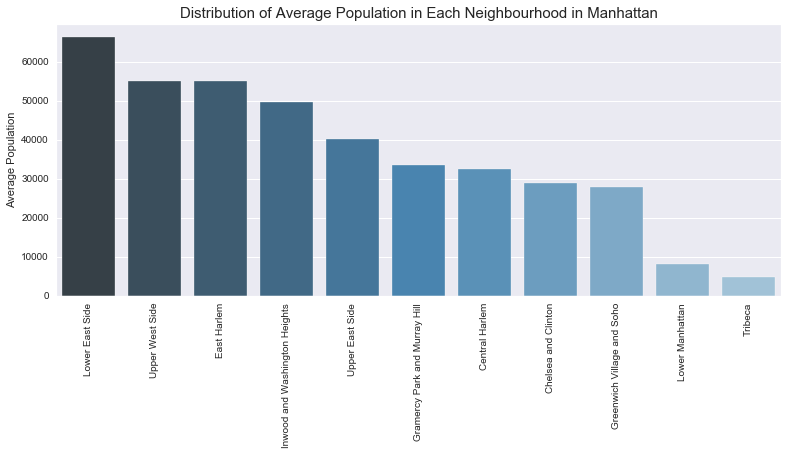

In [87]:
df_pop = df[['Neighbourhood', 'Average Population']]
df_pop.sort_values(by='Average Population', ascending = False, inplace = True)

plt.figure(figsize=(13,5))
income = sns.barplot(x='Neighbourhood', y = 'Average Population', data = df_pop, palette="Blues_d")
plt.title('Distribution of Average Population in Each Neighbourhood in Manhattan', fontsize = 15)
plt.ylabel('Average Population')
plt.xlabel(" ")
plt.xticks(rotation=90)

#### Prepare the Final Dataframe

In [88]:
df_final = pd.merge(df, ny_grouped, on='Neighbourhood')
df_final.drop(columns = ['Average Household Income','Average Population'], inplace = True)
df_final.head()

,zip,borough,post_office,Neighbourhood,Population,lat,long,Household Income,Asian Restaurant
0,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,40.750722,-73.997276,40932,0.04321
1,10011,Manhattan,"New York, NY",Chelsea and Clinton,50984,40.741844,-74.000711,61986,0.04321
2,10018,Manhattan,"New York, NY",Chelsea and Clinton,5229,40.754969,-73.992126,48705,0.04321
3,10019,Manhattan,"New York, NY",Chelsea and Clinton,42870,40.766331,-73.985013,55869,0.04321
4,10036,Manhattan,"New York, NY",Chelsea and Clinton,24711,40.759614,-73.991148,41002,0.04321


## III. K-Mean Clustering

First, let's take out the necessary columns to determine the clusters, and normalize the data!

In [89]:
from sklearn.preprocessing import StandardScaler
X = df_final.loc[:,['Population','Asian Restaurant','Household Income']]
X = np.nan_to_num(X)
clus = StandardScaler().fit_transform(X)
clus

array([[-0.68561563,  0.01318115, -0.45624355],
       [ 0.61838493,  0.01318115,  0.37217467],
       [-1.37828683,  0.01318115, -0.15039693],
       [ 0.26430352,  0.01318115,  0.13148719],
       [-0.5281249 ,  0.01318115, -0.45348924],
       [ 1.94612473,  2.65021506, -1.12160652],
       [ 0.83832211,  2.65021506,  0.32908936],
       [ 1.07060893,  2.65021506, -0.48599011],
       [-1.47167285, -0.84685057,  1.94142399],
       [-1.29511217, -0.84685057,  1.06197232],
       [-1.47507664, -0.84685057,  1.13346637],
       [-1.30152701, -0.84685057,  2.37735281],
       [-0.72061357, -0.84685057, -0.83460726],
       [-0.21728908,  1.58003228,  0.39110072],
       [ 0.75798394,  1.58003228,  0.54357154],
       [-0.88316634,  1.58003228,  0.6588985 ],
       [-0.21336163,  1.58003228,  1.09695207],
       [-0.5552243 , -0.61519357,  0.22765201],
       [-0.39768993, -0.61519357, -0.55964827],
       [-0.21183429, -0.61519357,  0.55376249],
       [ 0.29751229,  0.05012189,  0.902

In [90]:
normalized = pd.DataFrame(clus)
normalized.rename(columns={0:'Population', 1:'No. of Asian Restaurants', 2:'Household Income'}, inplace=True)
normalized.head()

,Population,No. of Asian Restaurants,Household Income
0,-0.685616,0.013181,-0.456244
1,0.618385,0.013181,0.372175
2,-1.378287,0.013181,-0.150397
3,0.264304,0.013181,0.131487
4,-0.528125,0.013181,-0.453489


### Finding the Optimal Number of Clusters (K)


I'm going to use the Elbow Method to choose the best K!

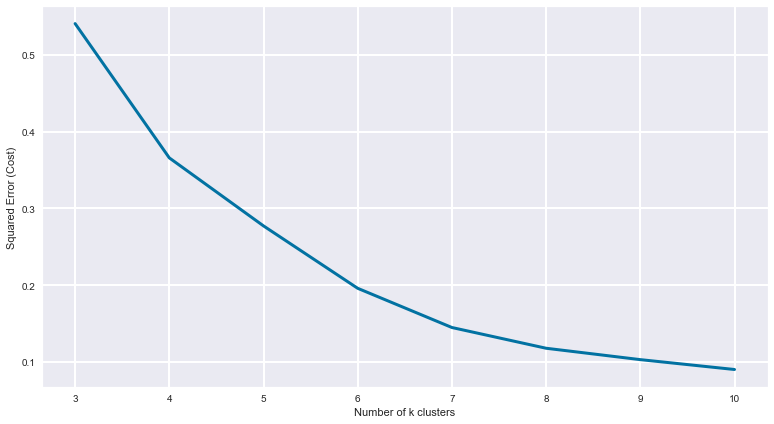

In [91]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='b', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

Seems like 6 is an optimal number for clusters. Let's use ***KElbowVisualizer*** to visual the Distortion Score Elbow to make sure!

/Users/chauchu/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a27ecafd0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

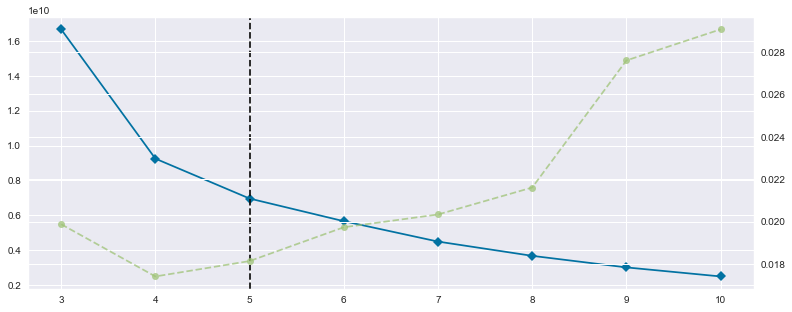

In [92]:
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(13,5))
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X)
visualizer

After using Elbow Method and analyzing Distortion Score & Squared error for each K value, looks like **K = 6** is the best value!

### Clustering Data using K = 6

In [105]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([3, 0, 3, 0, 3, 2, 2, 2, 1, 1], dtype=int32)

In [106]:
#Merge Cluster Label to original dataframe
clustered = pd.merge(df_final, normalized, left_index=True, right_index=True)
clustered.insert(0, 'Cluster Label', kmeans.labels_)
clustered.head()

,Cluster Label,zip,borough,post_office,Neighbourhood,Population_x,lat,long,Household Income_x,Asian Restaurant,Population_y,No. of Asian Restaurants,Household Income_y
0,3,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,40.750722,-73.997276,40932,0.04321,-0.685616,0.013181,-0.456244
1,0,10011,Manhattan,"New York, NY",Chelsea and Clinton,50984,40.741844,-74.000711,61986,0.04321,0.618385,0.013181,0.372175
2,3,10018,Manhattan,"New York, NY",Chelsea and Clinton,5229,40.754969,-73.992126,48705,0.04321,-1.378287,0.013181,-0.150397
3,0,10019,Manhattan,"New York, NY",Chelsea and Clinton,42870,40.766331,-73.985013,55869,0.04321,0.264304,0.013181,0.131487
4,3,10036,Manhattan,"New York, NY",Chelsea and Clinton,24711,40.759614,-73.991148,41002,0.04321,-0.528125,0.013181,-0.453489


In [107]:
clustered.drop(columns= ['Household Income_y','Population_y', 'No. of Asian Restaurants'], inplace = True)
clustered.rename(columns = {'Asian Restaurants':'No. of Asian Restaurants','Population_x':'Population',
                          'Household Income_x':'Household Income'}, inplace = True)
clustered.head() 

,Cluster Label,zip,borough,post_office,Neighbourhood,Population,lat,long,Household Income,Asian Restaurant
0,3,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,40.750722,-73.997276,40932,0.04321
1,0,10011,Manhattan,"New York, NY",Chelsea and Clinton,50984,40.741844,-74.000711,61986,0.04321
2,3,10018,Manhattan,"New York, NY",Chelsea and Clinton,5229,40.754969,-73.992126,48705,0.04321
3,0,10019,Manhattan,"New York, NY",Chelsea and Clinton,42870,40.766331,-73.985013,55869,0.04321
4,3,10036,Manhattan,"New York, NY",Chelsea and Clinton,24711,40.759614,-73.991148,41002,0.04321


### Visual the Clusters on the Map

In [108]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered['lat'], clustered['long'], clustered['Neighbourhood'], clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [109]:
#Move Population Column to last in df
cols = list(clustered.columns.values)
clustered = clustered[['Cluster Label',
 'zip',
 'borough',
 'post_office',
 'Neighbourhood',
 'lat',
 'long',
 'Household Income',
 'Asian Restaurant','Population']]

### Details of each Cluster

In [110]:
clustered.loc[clustered['Cluster Label'] == 0]

,Cluster Label,zip,borough,post_office,Neighbourhood,lat,long,Household Income,Asian Restaurant,Population
1,0,10011,Manhattan,"New York, NY",Chelsea and Clinton,40.741844,-74.000711,61986,0.043210,50984
3,0,10019,Manhattan,"New York, NY",Chelsea and Clinton,40.766331,-73.985013,55869,0.043210,42870
19,0,10014,Manhattan,"New York, NY",Greenwich Village and Soho,40.733471,-74.007098,66601,0.027119,31959
20,0,10021,Manhattan,"New York, NY",Upper East Side,40.769742,-73.961653,75472,0.044156,43631
21,0,10028,Manhattan,"New York, NY",Upper East Side,40.776865,-73.954721,77565,0.044156,45141
23,0,10128,Manhattan,"New York, NY",Upper East Side,40.781656,-73.950281,70031,0.044156,60453
24,0,10023,Manhattan,"New York, NY",Upper West Side,40.775394,-73.982197,72424,0.038043,60998
25,0,10024,Manhattan,"New York, NY",Upper West Side,40.786307,-73.970694,78066,0.038043,59283


In [111]:
clustered.loc[clustered['Cluster Label'] == 1]

,Cluster Label,zip,borough,post_office,Neighbourhood,lat,long,Household Income,Asian Restaurant,Population
8,1,10004,Manhattan,"New York, NY",Lower Manhattan,40.691870,-74.014109,101868,0.021186,3089
9,1,10005,Manhattan,"New York, NY",Lower Manhattan,40.705390,-74.008988,79517,0.021186,7135
10,1,10006,Manhattan,"New York, NY",Lower Manhattan,40.707970,-74.013610,81334,0.021186,3011
11,1,10007,Manhattan,"New York, NY",Lower Manhattan,40.713973,-74.008336,112947,0.021186,6988
27,1,10069,Manhattan,"New York, NY",Upper West Side,40.775551,-73.989689,88091,0.038043,5199
40,1,10282,Manhattan,"New York, NY",Tribeca,40.717017,-74.015566,86066,0.031250,4783


In [112]:
clustered.loc[clustered['Cluster Label'] == 2]

,Cluster Label,zip,borough,post_office,Neighbourhood,lat,long,Household Income,Asian Restaurant,Population
5,2,10002,Manhattan,"New York, NY",Lower East Side,40.715952,-73.985870,24022,0.110738,81410
6,2,10003,Manhattan,"New York, NY",Lower East Side,40.731856,-73.989145,60891,0.110738,56024
7,2,10009,Manhattan,"New York, NY",Lower East Side,40.726622,-73.978955,40176,0.110738,61347


In [113]:
clustered.loc[clustered['Cluster Label'] == 3]

,Cluster Label,zip,borough,post_office,Neighbourhood,lat,long,Household Income,Asian Restaurant,Population
0,3,10001,Manhattan,"New York, NY",Chelsea and Clinton,40.750722,-73.997276,40932,0.043210,21102
2,3,10018,Manhattan,"New York, NY",Chelsea and Clinton,40.754969,-73.992126,48705,0.043210,5229
4,3,10036,Manhattan,"New York, NY",Chelsea and Clinton,40.759614,-73.991148,41002,0.043210,24711
12,3,10038,Manhattan,"New York, NY",Lower Manhattan,40.709336,-74.002943,31316,0.021186,20300
17,3,10012,Manhattan,"New York, NY",Greenwich Village and Soho,40.725639,-73.998090,58313,0.027119,24090
18,3,10013,Manhattan,"New York, NY",Greenwich Village and Soho,40.720067,-74.004829,38304,0.027119,27700
22,3,10044,Manhattan,"New York, NY",Upper East Side,40.762050,-73.949933,49976,0.044156,11661
28,3,10026,Manhattan,"New York, NY",Central Harlem,40.802320,-73.952943,22491,0.023656,34003
30,3,10030,Manhattan,"New York, NY",Central Harlem,40.818492,-73.943283,17970,0.023656,26999
31,3,10037,Manhattan,"New York, NY",Central Harlem,40.813159,-73.937352,26561,0.023656,17416


In [114]:
clustered.loc[clustered['Cluster Label'] == 4]

,Cluster Label,zip,borough,post_office,Neighbourhood,lat,long,Household Income,Asian Restaurant,Population
26,4,10025,Manhattan,"New York, NY",Upper West Side,40.797958,-73.964917,49733,0.038043,94600
29,4,10027,Manhattan,"New York, NY",Central Harlem,40.811407,-73.953564,23150,0.023656,59707
33,4,10029,Manhattan,"New York, NY",East Harlem,40.792245,-73.945230,22232,0.038462,76003
35,4,10031,Manhattan,"New York, NY",Inwood and Washington Heights,40.825857,-73.949451,24285,0.026726,56438
36,4,10032,Manhattan,"New York, NY",Inwood and Washington Heights,40.839194,-73.942591,26237,0.026726,57331
37,4,10033,Manhattan,"New York, NY",Inwood and Washington Heights,40.849124,-73.935956,31348,0.026726,53926


In [116]:
clustered.loc[clustered['Cluster Label'] == 5]

,Cluster Label,zip,borough,post_office,Neighbourhood,lat,long,Household Income,Asian Restaurant,Population
13,5,10010,Manhattan,"New York, NY",Gramercy Park and Murray Hill,40.739122,-73.982363,62467,0.083333,31834
14,5,10016,Manhattan,"New York, NY",Gramercy Park and Murray Hill,40.744983,-73.978262,66342,0.083333,54183
15,5,10017,Manhattan,"New York, NY",Gramercy Park and Murray Hill,40.752292,-73.972393,69273,0.083333,16575
16,5,10022,Manhattan,"New York, NY",Gramercy Park and Murray Hill,40.758615,-73.967752,80406,0.083333,31924


## IV. Conclusion

Based on the analysis above, we can summarize the clusters' information:

In [120]:
cs = pd.DataFrame({'Cluster':[0,1,2,3,4,5], 
                   'Household Income': ['Medium & High','High','Low & Medium','Low & Medium','Medium','Medium & High'],
                  'No. of Asian Restaurants':['Mid', 'Low', 'High', 'Mid','Low','High'],
                  'Population':['Populated', 'Low', 'Populated', 'Mid','Populated', 'Mid']})
cs.set_index('Cluster', inplace = True)
cs


,Household Income,No. of Asian Restaurants,Population
Cluster,,,
0,Medium & High,Mid,Populated
1,High,Low,Low
2,Low & Medium,High,Populated
3,Low & Medium,Mid,Mid
4,Medium,Low,Populated
5,Medium & High,High,Mid


In this project, I labeled the neighbourhoods based on their characteristics: spending power, population, and the number of competitors. The most promising groups of neighbourhoods for opening an Asian Restaurant are **Cluster 0** and **Cluster 4**.

For **Cluster 0**, the high spending power and populated neighborhood allow them to upscale prices for the restaurant. For **Cluster 4**, the spending power is less. However, since the number of Asian Restaurant in these neighborhoods are low, and they are populated areas, we can open a more affordable restaurant here with a lot of competitive advantages. 

A lot of factors are required to open a restaurant, including the restaurant concept and brand. To find the best location, we need a more detailed plan. I also consider other traits to enhace the model in the future, which I will mention in the next part.

In conclusion, the extensive analysis above would give us a better idea to find a suitable location for the restaurant. We can also use this model to analyze different scenarios,such as opening different kind of venue, such as Bars/Pubs. 

## V. Future Directions

I think the model can be improved with more features and capturing better traits. For example, two restaurants might have a similar number of competitors, but one might have a smaller geographical radius while the other might a bigger radius. Moreover, household income might not be a good feature for the model. Since we want to open the restaurant in Manhattan, a lot of New Yorkers do not mind travel far to get to their favorite restaurants. There are also a lot of offices in Manhattan, and there are opportunities to provide the service to office workers.


There are many other factors to find a location to open a restaurant. In the future, to improve the model, I think I will also consider rent, crime rate, and also frequency of visits in each neighborhood. 